### Import module

In [43]:
#Import the necessary libraries first

import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

In [44]:
data = 'brain_tumor_dataset/'
No_brain_tumor = 'no/'
Yes_brain_tumor = 'yes/'

### Creating a dataframe showing tumour class with corresponding filepath

In [45]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
# ['brain_tumor_dataset/no/', 'brain_tumor_dataset/yes/']
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
# i
# ../input/brain-mri-images-for-brain-tumor-detection/no/
# ../input/brain-mri-images-for-brain-tumor-detection/yes/
# j
# No
# Yes

    filelist=os.listdir(i)
    print(filelist)
    print('\n')
# os.listdir --> returns a list containing the names of the entries in the directory given by path.
    for f in filelist:
        filepath=os.path.join (i,f)
# os.path.join('brain_tumor_dataset/no/','1 no.jpeg;)
# brain_tumor_dataset/no/1 no.jpeg
        filepaths.append(filepath)
# store the path into empty list called filepaths
        labels.append(j)
    print(filepaths)
    print('\n')
    print(labels)
    print('\n')
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 7.jpeg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 90.jpg', 'no 91.jpeg', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no

In [46]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
# df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
# df.head()
df

,filepaths,labels
0,no/1 no.jpeg,No
1,no/10 no.jpg,No
2,no/11 no.jpg,No
3,no/12 no.jpg,No
4,no/13 no.jpg,No
...,...,...
248,yes/Y95.jpg,Yes
249,yes/Y96.jpg,Yes
250,yes/Y97.JPG,Yes
251,yes/Y98.JPG,Yes


In [47]:
df['labels']=pd.get_dummies(df['labels'])

In [48]:
df

,filepaths,labels
0,no/1 no.jpeg,1
1,no/10 no.jpg,1
2,no/11 no.jpg,1
3,no/12 no.jpg,1
4,no/13 no.jpg,1
...,...,...
248,yes/Y95.jpg,0
249,yes/Y96.jpg,0
250,yes/Y97.JPG,0
251,yes/Y98.JPG,0


### Visualize the image of brain tumour

<Figure size 288x288 with 0 Axes>

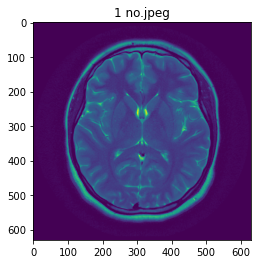

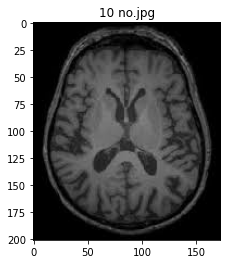

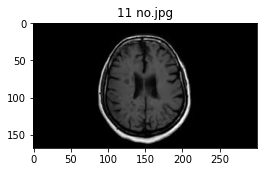

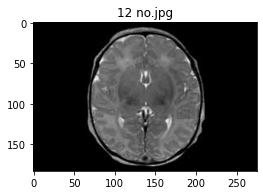

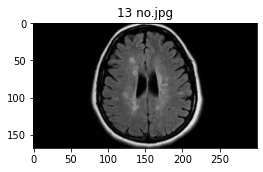

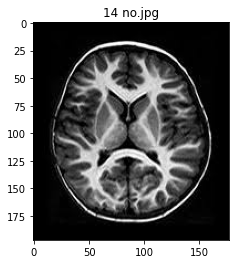

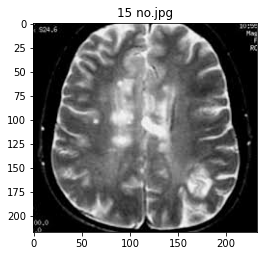

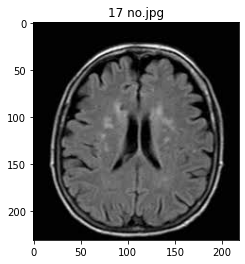

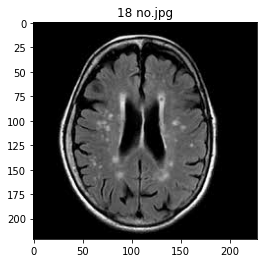

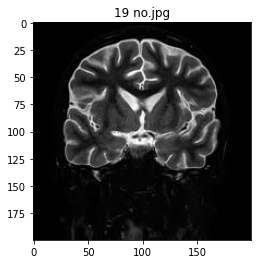

In [49]:
plt.figure(figsize=(4,4))
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

Since each image has different size, we need to resize them into same size

In [50]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
#   print(path)
# brain_tumor_dataset/no/1 no.jpeg
# brain_tumor_dataset/no/10 no.jpg
# brain_tumor_dataset/no/11 no.jpg
# brain_tumor_dataset/no/12 no.jpg
# brain_tumor_dataset/no/13 no.jpg
# brain_tumor_dataset/no/14 no.jpg
    im = Image.open(path)
    
#     print(im)
# <PIL.JpegImagePlugin.JpegImageFile image mode=L size=630x630 at 0x1888E54F7C0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=173x201 at 0x1888E59BFA0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x1888E540340>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x1888D29BFA0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x1888E540C70>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=177x197 at 0x1888E5317F0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=232x217 at 0x1888E540C70>
#     print(im.size)
# (630, 630)
# (173, 201)
# (300, 168)
# (275, 183)
# (300, 168)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


The average width is 354 and the average height is 386.
Making the width and height equal makes it simpler to do transformations later. So we’ll resize images to 300x300.

In [51]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image


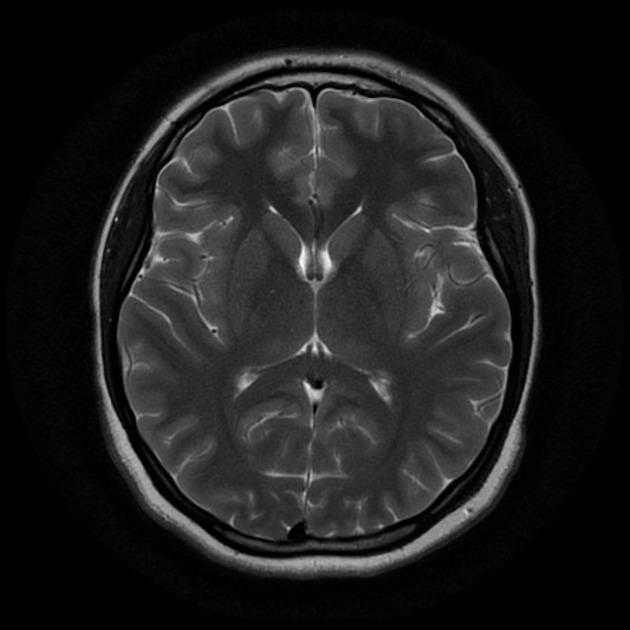

In [52]:
load_img('no/1 no.jpeg')

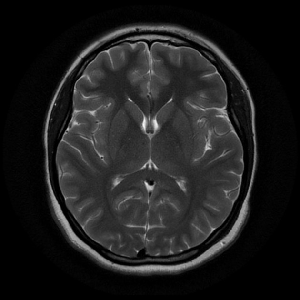

In [53]:
load_img('no/1 no.jpeg',target_size=(300,300))

In [54]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
#   print(path)
#   print(cancer)
# brain_tumor_dataset/no/1 no.jpeg
# No
# brain_tumor_dataset/no/10 no.jpg
# No
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [55]:
print(image_list[0:5])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [56]:
print(cancer_list[0:5])

[1, 1, 1, 1, 1]


### Shuffle the image and label

In [57]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

### Define our X, y for train-test-split

In [58]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [59]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


### Split into training set and testing set

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [61]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


### Building CNN Model Architecture

In [64]:
epochs = 50
batch_size = 10
input_shape = (300,300,3)


In [65]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ANN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [67]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/50
21/21 [==============================] - 15s 667ms/step - loss: 0.7372 - accuracy: 0.6024 - val_loss: 0.5106 - val_accuracy: 0.8039
Epoch 2/50
21/21 [==============================] - 14s 651ms/step - loss: 0.4972 - accuracy: 0.7759 - val_loss: 0.5199 - val_accuracy: 0.8235
Epoch 3/50
21/21 [==============================] - 14s 652ms/step - loss: 0.4054 - accuracy: 0.8484 - val_loss: 0.4808 - val_accuracy: 0.8039
Epoch 4/50
21/21 [==============================] - 14s 656ms/step - loss: 0.3022 - accuracy: 0.8985 - val_loss: 0.5498 - val_accuracy: 0.8039
Epoch 5/50
21/21 [==============================] - 14s 649ms/step - loss: 0.2285 - accuracy: 0.9104 - val_loss: 0.6504 - val_accuracy: 0.7843
Epoch 6/50
21/21 [==============================] - 14s 658ms/step - loss: 0.1543 - accuracy: 0.9400 - val_loss: 0.5676 - val_accuracy: 0.8824
Epoch 7/50
21/21 [==============================] - 14s 649ms/step - loss: 0.0682 - accuracy: 0.9823 - val_loss: 0.6366 - val_accuracy: 0.8627

Test loss: 2.7761220932006836
Test accuracy: 0.8235294222831726


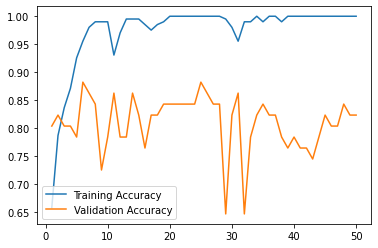

In [70]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()


model.save("model.h5")